In [1]:
# Dependencies
import pandas as pd
from collections import defaultdict
import operator
import matplotlib.pyplot as plt

csv_data = "Resources/survey_results_public.csv"
df = pd.read_csv(csv_data, encoding="utf-8")
print(df.shape)

(98855, 43)


C:\Users\msatyana\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


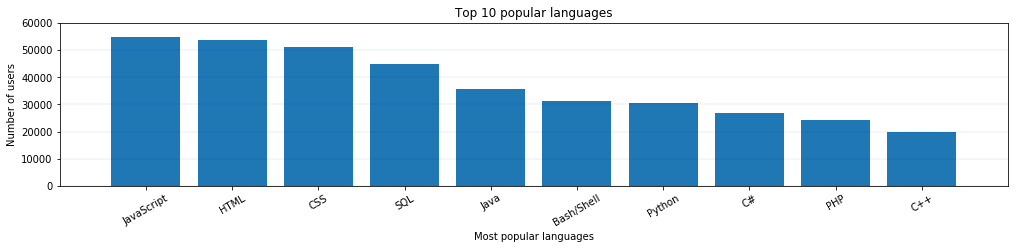

In [3]:
lang = df['LanguageWorkedWith'].dropna().tolist()
lang_dict = {}
for i in lang:
    ind_lang = i.split(';')
    #print(ind_lang)
    for k in ind_lang:
        lang_dict[k] = lang_dict.get(k, 0) + 1

s_lang_dict = sorted(lang_dict.items(), key=operator.itemgetter(1), reverse=True)
# sorted_names = sorted(lang_dict, key=lambda x: lang_dict[x])
# sorted_names
x_axis = [i[0] for i in s_lang_dict]
y_axis = [i[1] for i in s_lang_dict]
x_axis = x_axis[:10]
top_lang = x_axis
y_axis = y_axis[:10]
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(17,3))
ax.bar(x_axis, y_axis)
ax.set_xlim(-1, 10)
ax.set_ylim(0, 60000)
ax.set_xlabel('Most popular languages')
ax.set_ylabel('Number of users')
ax.set_title('Top 10 popular languages')
ax.set_xticklabels(x_axis, rotation=30)
ax.yaxis.grid(True, which='major', linewidth=0.4,
                  color='blue', linestyle='-', alpha=0.2)
# Save the Figure
plt.savefig("Images/PopularLangs.png")

plt.show()

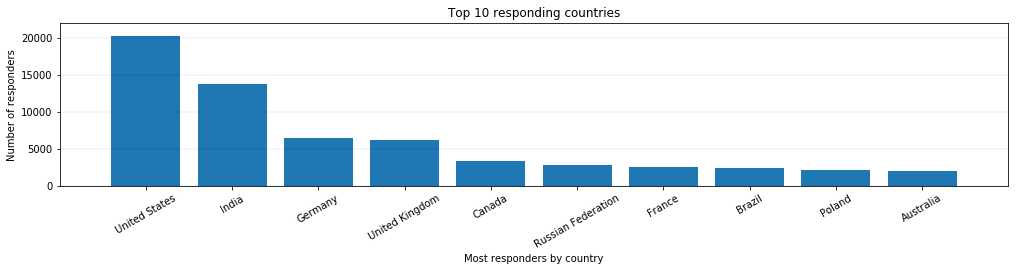

In [5]:
top_countries_ser = df['Country'].value_counts().nlargest(10)
x_axis = top_countries_ser.index.tolist()
top_countries = x_axis
y_axis = top_countries_ser.tolist()
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(17,3))
ax.bar(x_axis, y_axis)
ax.set_xlim(-1, 10)
ax.set_ylim(0, 22000)
ax.set_xlabel('Most responders by country')
ax.set_ylabel('Number of responders')
ax.set_title('Top 10 responding countries')
ax.set_xticklabels(x_axis, rotation=30)
ax.yaxis.grid(True, which='major', linewidth=0.4,
                  color='blue', linestyle='-', alpha=0.2)
# Save the Figure
plt.savefig("Images/TopCountries.png")
plt.show()

### Countrywise languages

In [6]:
df.head()
df.columns
cols = ['Country', 'ConvertedSalary', 'CareerSatisfaction', 'LanguageWorkedWith',
        'DatabaseWorkedWith', 'PlatformWorkedWith', 'FrameworkWorkedWith', 'OperatingSystem',
        'EducationParents', 'Age']

# Generate a sorted list of top 10 countries
sel_df = df[cols].copy()
sel_df_c = sel_df[sel_df['Country'].isin(x_axis)]
sel_df_c.sort_values(['Country'], inplace=True)
sel_df_c.head()

# Generate a list of popular languages by country
c1 = sel_df_c[['LanguageWorkedWith', 'Country']]
print(c1.shape)
c1.dropna(subset=['LanguageWorkedWith'], inplace=True)
print(c1.shape)
c1.head()

lang_df = pd.DataFrame(0, index=top_lang, columns=top_countries)

for cnt, i in enumerate (c1.itertuples()):
    #print(i[1])
    for j in i[1].split(';'):
        #print(f'{j} {i[2]}')
        if(j in top_lang):
            #print(lang_df.loc[j, i[2]])
            lang_df.loc[j, i[2]] = lang_df.loc[j, i[2]] + 1

lang_df

C:\Users\msatyana\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\msatyana\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(62189, 2)
(50274, 2)


,United States,India,Germany,United Kingdom,Canada,Russian Federation,France,Brazil,Poland,Australia
JavaScript,13126,6115,3402,3871,2111,1263,1439,1424,1081,1299
HTML,12479,6319,3438,3758,2032,1215,1407,1357,983,1237
CSS,11979,5873,3244,3588,1965,1153,1368,1294,941,1200
SQL,10597,4764,2860,3160,1649,1136,1154,1191,874,1047
Java,7155,5128,2833,1799,1239,816,951,987,706,591
Bash/Shell,9069,1956,2606,2336,1378,828,1021,647,663,795
Python,8324,2830,2143,2175,1340,798,876,693,609,686
C#,6383,2056,1700,2214,1079,721,570,645,600,709
PHP,3968,3070,1746,1419,798,537,775,704,416,463
C++,4058,2763,1615,1021,756,650,581,374,466,348


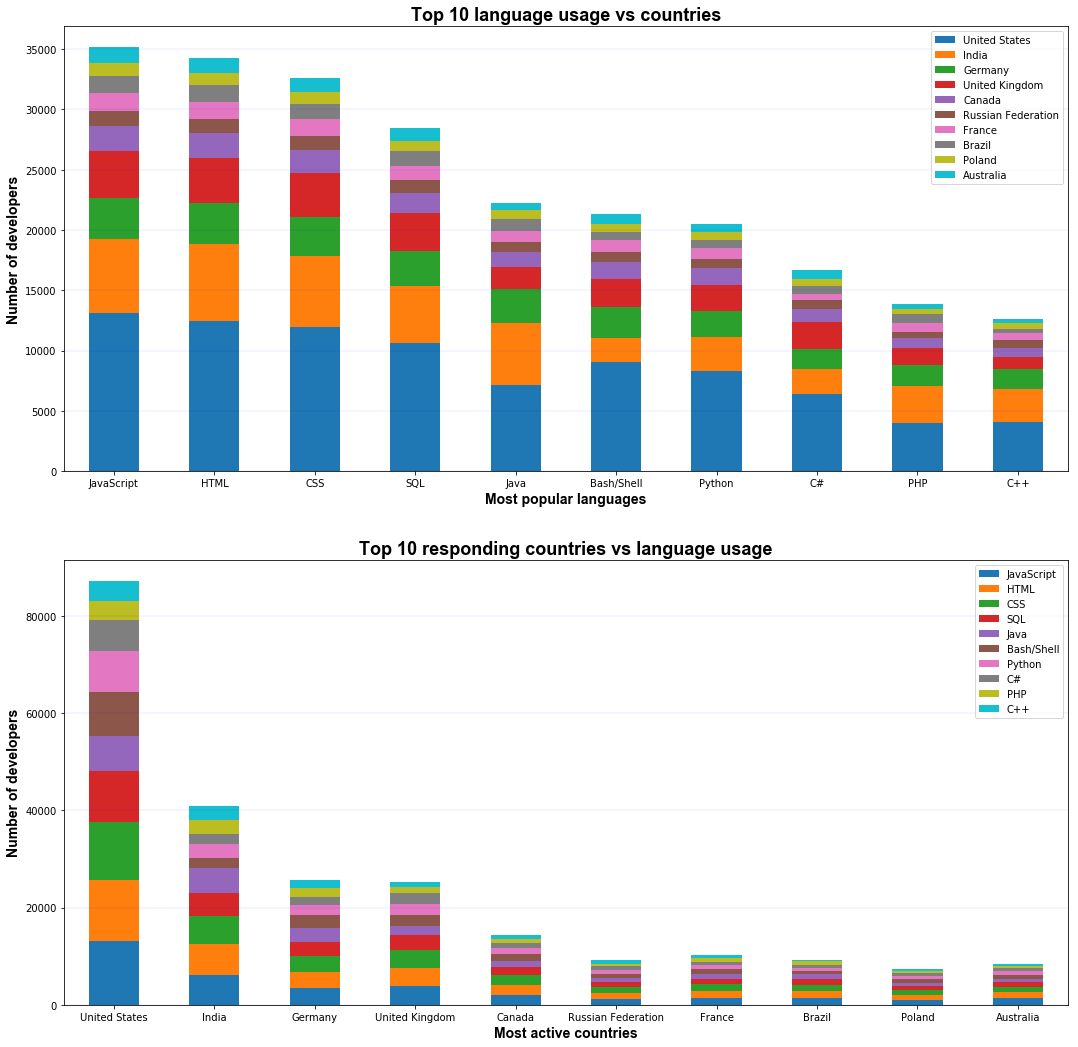

In [7]:
font_name = {'fontname':'Arial'}

fig, ax_array = plt.subplots(2, 1, figsize=(18,18))
lang_df.plot(kind='bar', ax=ax_array[0], rot=0, stacked=True)
ax_array[0].yaxis.grid(True, which='major', linewidth=0.4,
                  color='blue', linestyle='-', alpha=0.2)
ax_array[0].set_xlabel('Most popular languages', fontsize=14, **font_name, fontweight='bold')
ax_array[0].set_ylabel('Number of developers', fontsize=14, **font_name, fontweight='bold')
ax_array[0].set_title('Top 10 language usage vs countries', fontsize=18, **font_name, fontweight='bold')


lang_df.T.plot(kind='bar', ax=ax_array[1], rot=0, stacked=True)
ax_array[1].yaxis.grid(True, which='major', linewidth=0.4,
                  color='blue', linestyle='-', alpha=0.2)
ax_array[1].set_xlabel('Most active countries', fontsize=14, **font_name, fontweight='bold')
ax_array[1].set_ylabel('Number of developers', fontsize=14, **font_name, fontweight='bold')
ax_array[1].set_title('Top 10 responding countries vs language usage', fontsize=18, **font_name, fontweight='bold')

# Save the Figure
plt.savefig("Images/LangvsCountry.png")
plt.show()

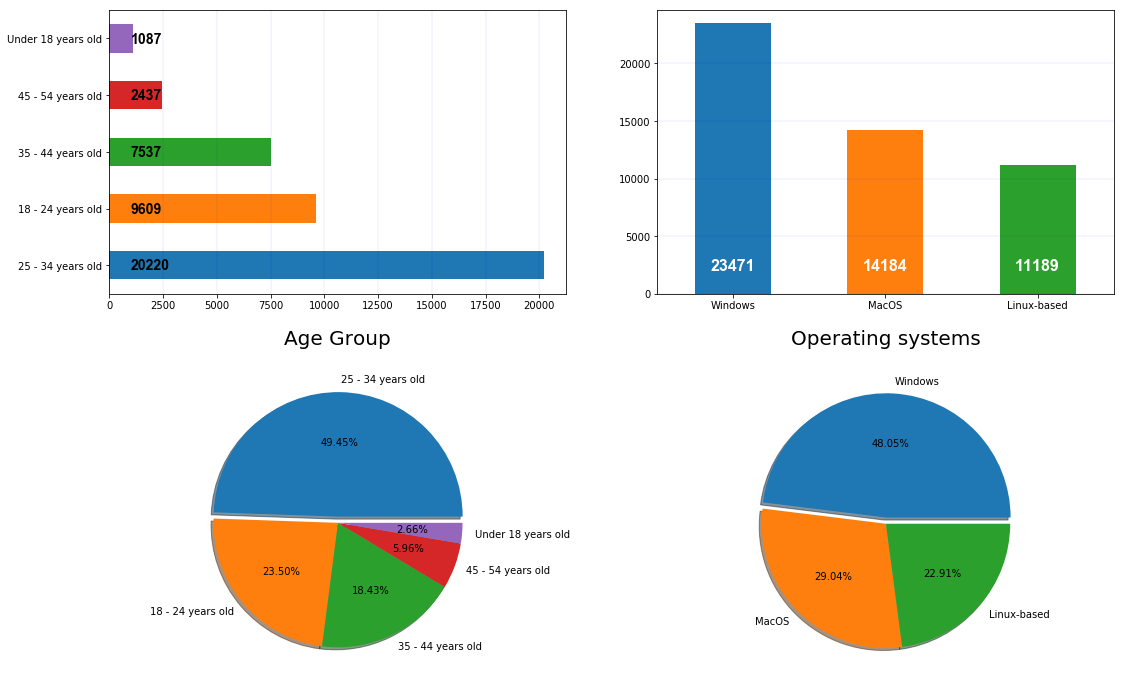

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(18,12))

# Horizontal bar chart
sel_df_c['Age'].value_counts().head(5).plot(kind='barh', ax=ax[0, 0])
for p in ax[0, 0].patches:
    ax[0, 0].annotate(str(p.get_width()), (1000, p.get_y() + 0.17), color='black', fontsize=14, **font_name, fontweight='bold')
ax[0, 0].xaxis.grid(True, which='major', linewidth=0.4,
                  color='blue', linestyle='-', alpha=0.2)

# Pie chart
explode = (0.05, 0, 0, 0, 0)
sel_df_c['Age'].value_counts().head(5).plot(kind='pie', ax=ax[1, 0], explode=explode, autopct='%.2f%%', title='Age Group', shadow=True)
ax[1, 0].axis('equal')
ax[1, 0].set_ylabel('')
ax[1, 0].title.set_position([0.5, 1.1])
ax[1, 0].title.set_size(20)
#  Indicates age group 25-44 is peak developer age

# Operating system bar chart
sel_df_c['OperatingSystem'].value_counts().head(3).plot(kind='bar', ax=ax[0, 1], rot=0)
for p in ax[0, 1].patches:
    ax[0, 1].annotate(str(p.get_height()), (p.get_x() + 0.1, 2000), color='w', fontsize=16, **font_name, fontweight='bold')
ax[0, 1].yaxis.grid(True, which='major', linewidth=0.4,
                  color='blue', linestyle='-', alpha=0.2)

# Pie chart
explode = (0.05, 0, 0)
sel_df_c['OperatingSystem'].value_counts().head(3).plot(kind='pie', ax=ax[1, 1], explode=explode, autopct='%.2f%%', title='Operating systems', shadow=True)
ax[1, 1].axis('equal')
ax[1, 1].set_ylabel('')
ax[1, 1].title.set_position([0.5, 1.1])
# ax[1, 1].set_title('Title', pad=30)
ax[1, 1].title.set_size(20)
fig.subplots_adjust(hspace=.3)

# Save the Figure
plt.savefig("Images/Age_OS.png")

plt.show()

### Salary trends

In [9]:
sal_df = sel_df_c[['Country', 'ConvertedSalary']]

C:\Users\msatyana\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


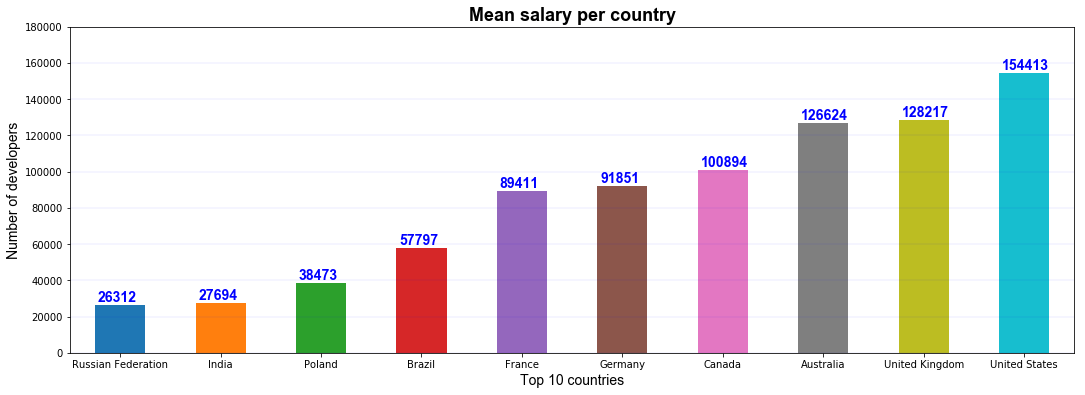

In [10]:
sal_df.dropna(subset=['ConvertedSalary'], inplace=True)
mean_sal = sal_df.groupby('Country')['ConvertedSalary'].mean()
mean_sal.sort_values(inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
mean_sal.plot(kind='bar', ax=ax, rot=0, ylim=(0, 180000))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.03, p.get_height()+ 2000),
                color='b', fontsize=14, fontweight='bold', **font_name)
ax.yaxis.grid(True, which='major', linewidth=0.4,
                  color='blue', linestyle='-', alpha=0.2)
ax.set_xlabel('Top 10 countries', fontsize=14, **font_name)
ax.set_ylabel('Number of developers', fontsize=14, **font_name)
ax.set_title('Mean salary per country', fontsize=18, **font_name, fontweight='bold')

# Save the Figure
plt.savefig("Images/MeanSalary.png")

plt.show()

C:\Users\msatyana\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


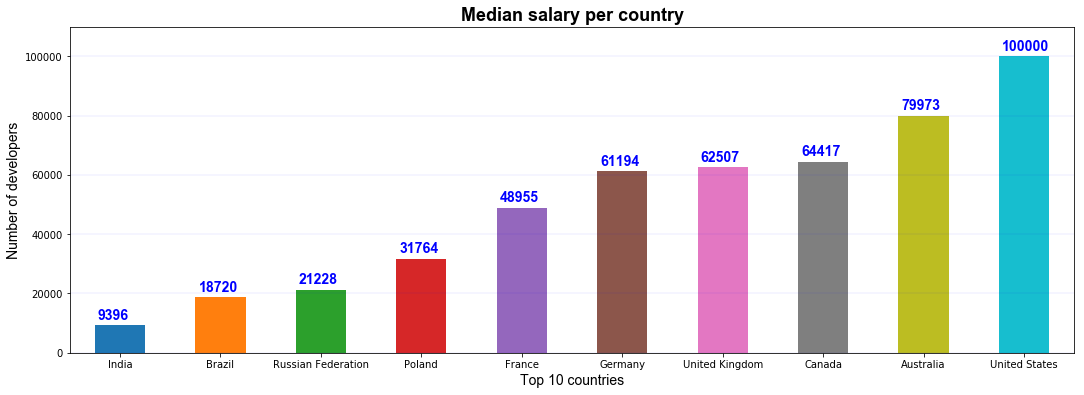

In [11]:
sal_df = sel_df_c[['Country', 'ConvertedSalary']]
sal_df.dropna(subset=['ConvertedSalary'], inplace=True)
med_sal = sal_df.groupby('Country')['ConvertedSalary'].median()
med_sal.sort_values(inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
med_sal.plot(kind='bar', ax=ax, rot=0, ylim=(0, 110000))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.03, p.get_height()+ 2000),
                color='b', fontsize=14, fontweight='bold', **font_name)
ax.yaxis.grid(True, which='major', linewidth=0.4,
                  color='blue', linestyle='-', alpha=0.2)
ax.set_xlabel('Top 10 countries', fontsize=14, **font_name)
ax.set_ylabel('Number of developers', fontsize=14, **font_name)
ax.set_title('Median salary per country', fontsize=18, **font_name, fontweight='bold')

# Save the Figure
plt.savefig("Images/MedianSalary.png")

plt.show()

In [12]:
top_lang
sal_df = sel_df_c[['Country', 'LanguageWorkedWith']]
sal_df.dropna(subset=['LanguageWorkedWith'], inplace=True)
top_countries

C:\Users\msatyana\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


['United States',
 'India',
 'Germany',
 'United Kingdom',
 'Canada',
 'Russian Federation',
 'France',
 'Brazil',
 'Poland',
 'Australia']

In [13]:
# Alternative way to generate DataFrame Country vs Language

from collections import Counter

grouped_languages = sal_df.groupby('Country')['LanguageWorkedWith'].agg(lambda col: ';'.join(col))

rows = []

for country, languages in grouped_languages.iteritems():
    counts = Counter(languages.split(';'))
    rows.append([country] + [counts.get(lang, 0) for lang in top_lang])

new_df = pd.DataFrame.from_records(rows, columns=['country'] + top_lang)
new_df = new_df.set_index('country')
new_df
aa = new_df.T[top_countries]
aa.index.name='Languages'
aa

country,United States,India,Germany,United Kingdom,Canada,Russian Federation,France,Brazil,Poland,Australia
Languages,,,,,,,,,,
JavaScript,13126,6115,3402,3871,2111,1263,1439,1424,1081,1299
HTML,12479,6319,3438,3758,2032,1215,1407,1357,983,1237
CSS,11979,5873,3244,3588,1965,1153,1368,1294,941,1200
SQL,10597,4764,2860,3160,1649,1136,1154,1191,874,1047
Java,7155,5128,2833,1799,1239,816,951,987,706,591
Bash/Shell,9069,1956,2606,2336,1378,828,1021,647,663,795
Python,8324,2830,2143,2175,1340,798,876,693,609,686
C#,6383,2056,1700,2214,1079,721,570,645,600,709
PHP,3968,3070,1746,1419,798,537,775,704,416,463


In [14]:
# Dependencies
import gmaps
import requests
import json

# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

lat = []
lng = []
ctry_loc = pd.DataFrame(top_countries_ser)
for ctry in top_countries:
    print(ctry)
    # Build the endpoint URL
    # Address to geocode
    address = ctry
    geocode_url = f"https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={gkey}"
    # Run a request to endpoint and convert result to json
    geo_data = requests.get(geocode_url).json()
#     geo_data = {'results': [{'address_components': [{'long_name': 'India', 'short_name': 'IN', 'types': ['country', 'political']}], 'formatted_address': 'India', 'geometry': {'bounds': {'northeast': {'lat': 35.513327, 'lng': 97.39535869999999}, 'southwest': {'lat': 6.4626999, 'lng': 68.1097}}, 'location': {'lat': 20.593684, 'lng': 78.96288}, 'location_type': 'APPROXIMATE', 'viewport': {'northeast': {'lat': 35.513327, 'lng': 97.39535869999999}, 'southwest': {'lat': 6.4626999, 'lng': 68.1097}}}, 'place_id': 'ChIJkbeSa_BfYzARphNChaFPjNc', 'types': ['country', 'political']}], 'status': 'OK'}
    lat.append(geo_data["results"][0]["geometry"]["location"]["lat"])
    lng.append(geo_data["results"][0]["geometry"]["location"]["lng"])

ctry_loc = ctry_loc.assign(Latitude=lat)
ctry_loc = ctry_loc.assign(Longitude=lng)
ctry_loc

ModuleNotFoundError: No module named 'config'

### Respondents heat map

In [15]:
import gmaps

# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

# Store latitude and longitude in locations
locations = ctry_loc[["Latitude", "Longitude"]]
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=ctry_loc['Country'], 
                                 dissipating=False, max_intensity=10000,
                                 point_radius=7)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig


ModuleNotFoundError: No module named 'config'